# Модуль 6. Нейронные сети и глубокое обучение

## 1. Введение в нейронные сети

### 1. Что такое нейронные сети?


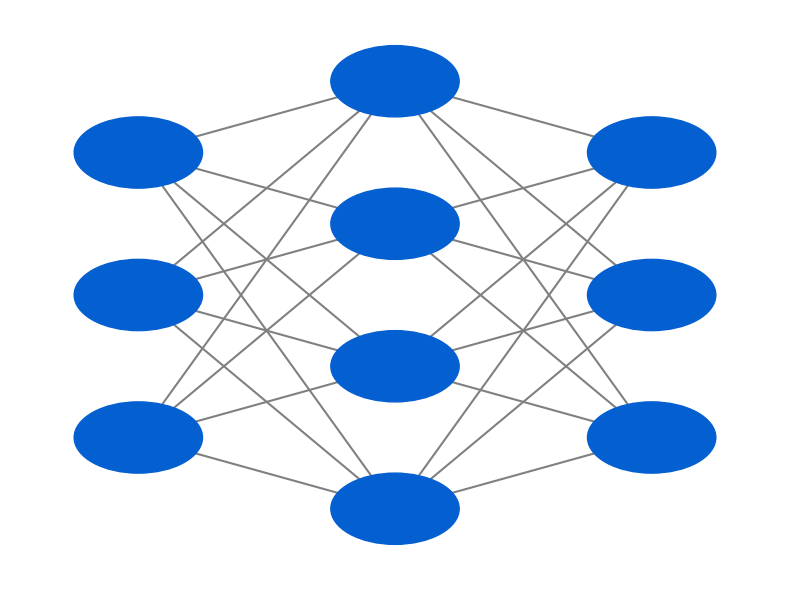

In [14]:
import matplotlib.pyplot as plt
import numpy as np


def draw_neural_network():
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw nodes
    for i in range(3):
        circle = plt.Circle((1, (i + 1) * 2), 0.5, color="#045FD0", zorder=4)
        ax.add_artist(circle)

    for i in range(4):
        circle = plt.Circle((3, (i + 0.5) * 2), 0.5, color="#045FD0", zorder=4)
        ax.add_artist(circle)

    for i in range(3):
        circle = plt.Circle((5, (i + 1) * 2), 0.5, color="#045FD0", zorder=4)
        ax.add_artist(circle)

    # Draw connections
    for i in range(3):
        for j in range(4):
            line = plt.Line2D([1, 3], [(i + 1) * 2, (j + 0.5) * 2], color="gray")
            ax.add_artist(line)

    for i in range(4):
        for j in range(3):
            line = plt.Line2D([3, 5], [(i + 0.5) * 2, (j + 1) * 2], color="gray")
            ax.add_artist(line)

    ax.set_xlim(0, 6)
    ax.set_ylim(0, 8)
    ax.axis("off")

    plt.tight_layout()
    plt.savefig("neural_network_diagram.png", format="png")
    plt.show()


draw_neural_network()

### 2. Биологический против искусственного нейрона


In [12]:
import matplotlib.pyplot as plt
from PIL import Image

# Загрузка изображений
bio_neuron = Image.open("biological_neuron_image.png")
artificial_neuron = Image.open("artificial_neuron_image.png")

# Создание фигуры и осей
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Отображение изображений
ax[0].imshow(bio_neuron)
ax[0].set_title("Биологический нейрон")
ax[0].axis("off")

ax[1].imshow(artificial_neuron)
ax[1].set_title("Искусственный нейрон")
ax[1].axis("off")

plt.tight_layout()

# Явное сохранение изображения в файл
output_filename = "comparison_neuron.png"
plt.savefig(output_filename, dpi=300, bbox_inches="tight")

# Закрытие фигуры
plt.close(fig)

# Вывод информации о успешном сохранении
print(f"Изображение успешно сохранено в файл {output_filename}")

Изображение успешно сохранено в файл comparison_neuron.png


## Нелинейные зависимости


Код нейронной сети для аппроксимации функции $ f(x) = sin(x) \cdot e^{-0.1x} $ с использованием библиотеки PyTorch и визуализации результатов с помощью библиотеки Matplotlib.


Epoch 0/5000, Loss: 0.5602189302444458
Epoch 500/5000, Loss: 0.006537371780723333
Epoch 1000/5000, Loss: 0.0004096172342542559
Epoch 1500/5000, Loss: 0.0003585803497117013
Epoch 2000/5000, Loss: 0.0003997816238552332
Epoch 2500/5000, Loss: 0.0002477455127518624
Epoch 3000/5000, Loss: 0.00022394978441298008
Epoch 3500/5000, Loss: 4.14544265368022e-05
Epoch 4000/5000, Loss: 7.077076588757336e-05
Epoch 4500/5000, Loss: 9.227854025084525e-05


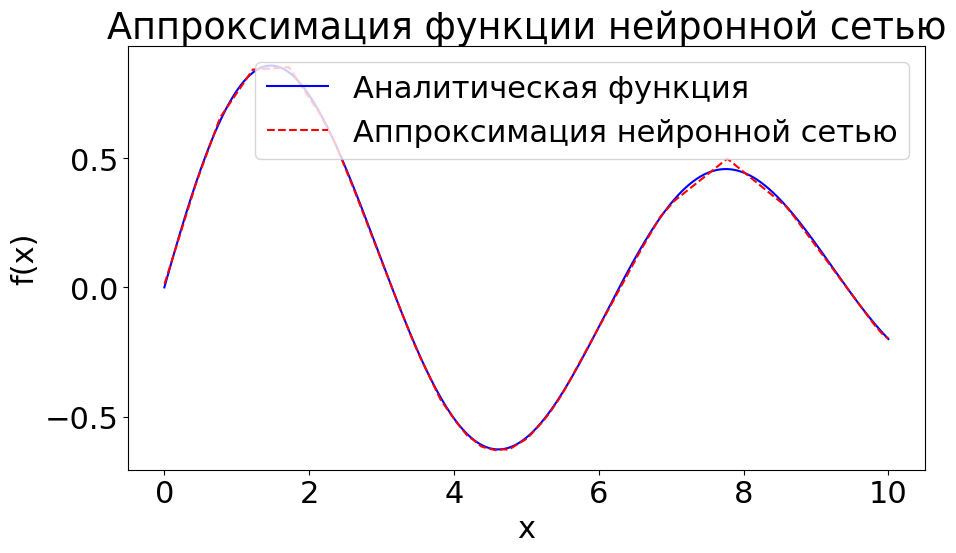

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Генерация данных
x = np.linspace(0, 10, 1000)
y = np.sin(x) * np.exp(-0.1 * x)

x_tensor = torch.Tensor(x).view(-1, 1)
y_tensor = torch.Tensor(y).view(-1, 1)


# Определение нейронной сети
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


net = Net()

# Параметры обучения
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
epochs = 5000

# Обучение нейронной сети
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# Визуализация
y_pred = net(x_tensor).detach().numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Аналитическая функция", color="blue")
plt.plot(x, y_pred, label="Аппроксимация нейронной сетью", color="red", linestyle="--")
plt.legend()
plt.title("Аппроксимация функции нейронной сетью")
plt.xlabel("x")
plt.ylabel("f(x)")
# Сохраняем изображение
plt.rcParams.update({"font.size": 22})
img_path = "non_liner_approx.png"
plt.tight_layout()
plt.savefig(img_path, dpi=300)
plt.show()

### 4. Применения и возможности


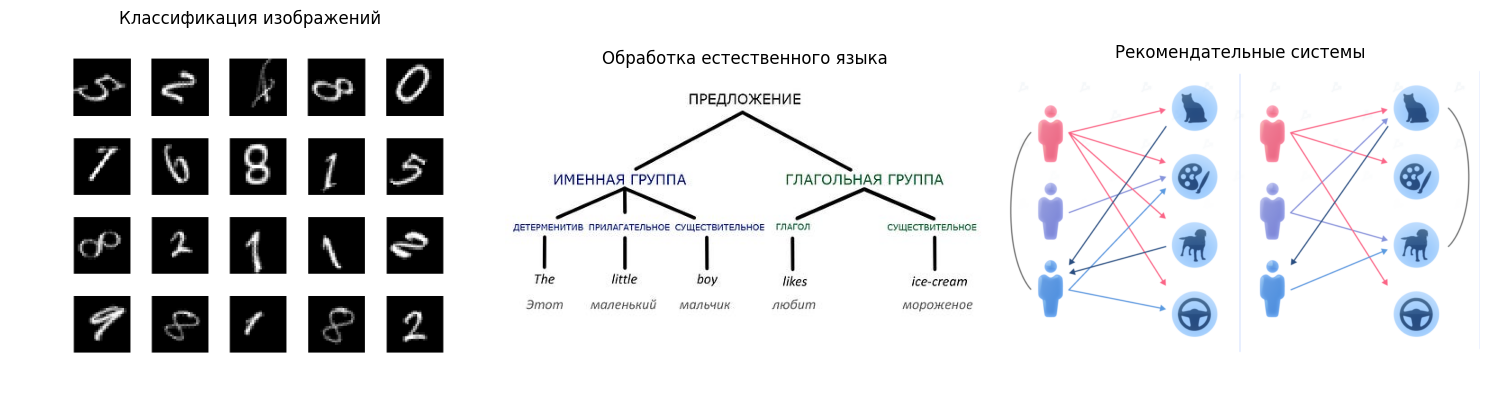

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загружаем изображения (здесь я использую плейсхолдеры, вы можете заменить их на свои изображения)
img_classification = mpimg.imread(
    "classification.png"
)  # Замените на путь к вашему изображению
img_nlp = mpimg.imread("nlp.jpg")  # Замените на путь к вашему изображению
img_recommendation = mpimg.imread(
    "recommendation.png"
)  # Замените на путь к вашему изображению

# Создаём композитное изображение с тремя столбцами
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_classification)
axs[0].axis("off")
axs[0].set_title("Классификация изображений")

axs[1].imshow(img_nlp)
axs[1].axis("off")
axs[1].set_title("Обработка естественного языка")

axs[2].imshow(img_recommendation)
axs[2].axis("off")
axs[2].set_title("Рекомендательные системы")

# Сохраняем изображение
img_path = "neural_network_applications.png"
plt.tight_layout()
plt.savefig(img_path, dpi=300)
plt.show()

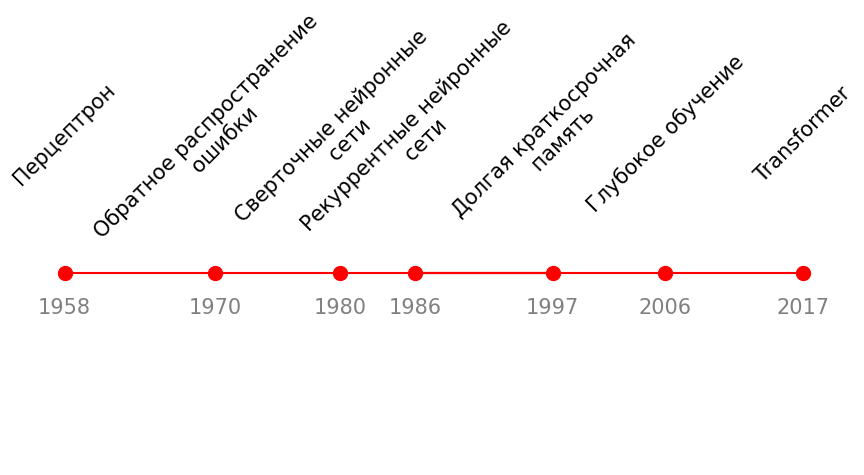

In [75]:
import matplotlib.pyplot as plt

events = [
    "Перцептрон",
    "Обратное распространение\n ошибки",
    "Сверточные нейронные\n сети",
    "Долгая краткосрочная\n память",
    "Рекуррентные нейронные\n сети",
    "Глубокое обучение",
    "Transformer",
]
years = [1958, 1970, 1980, 1997, 1986, 2006, 2017]

fig, ax = plt.subplots(figsize=(9, 5))

# Рисуем ось
ax.plot(years, [1] * len(years), "ro-", markersize=10)

# Убираем ненужные элементы
ax.axis("off")

# Смещаем начало оси X для лучшего размещения "Перцептрон"
ax.set_xlim(1955, 2020)

# Добавляем годы снизу
for i, year in enumerate(years):
    ax.text(year, 0.99, str(year), ha="center", va="center", color="gray")

# Добавляем события с наклоном
for i, (year, event) in enumerate(zip(years, events)):
    ax.text(
        year,
        1.04,
        event,
        ha="center",
        va="center",
        rotation=45,
        rotation_mode="anchor",
        color="black",
    )

plt.tight_layout()
plt.show()

## 2. Основные архитектуры и их применение

### 1. Перцептрон и многослойный перцептрон


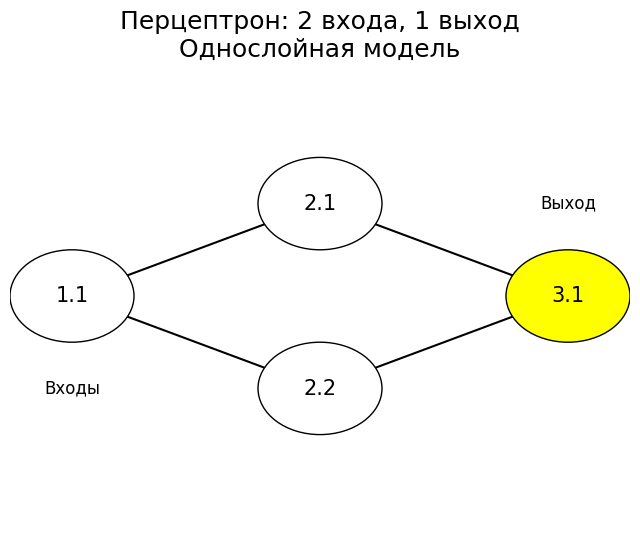

In [201]:
import matplotlib.pyplot as plt


def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    """
    Draw a neural network cartoon using matplotilb.
    """
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size):
            color = "w"
            if n == len(layer_sizes) - 1 and m == 0:  # Highlight the last neuron
                color = "yellow"
            circle = plt.Circle(
                (n * h_spacing + left, layer_top - m * v_spacing),
                v_spacing / 4.0,
                color=color,
                ec="k",
                zorder=4,
            )
            ax.add_artist(circle)

            # Add numbers inside circles
            plt.text(
                n * h_spacing + left,
                layer_top - m * v_spacing,
                f"{n + 1}.{m+1}",
                ha="center",
                va="center",
                zorder=5,
            )

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(
        zip(layer_sizes[:-1], layer_sizes[1:])
    ):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2.0 + (top + bottom) / 2.0
        layer_top_b = v_spacing * (layer_size_b - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D(
                    [n * h_spacing + left, (n + 1) * h_spacing + left],
                    [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                    c="k",
                )
                ax.add_artist(line)

    # Annotations
    plt.text(
        left, bottom - v_spacing + 0.6, "Входы", ha="center", va="center", fontsize=12
    )
    plt.text(
        right, top + v_spacing / 2 - 0.4, "Выход", ha="center", va="center", fontsize=12
    )


fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.axis("off")
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, [1, 2, 1])
plt.title("Перцептрон: 2 входа, 1 выход\nОднослойная модель")
plt.savefig("perceptron_vs_mlp.png")

## 3. Механизмы обучения и оптимизации

### 1. Принципы обучения


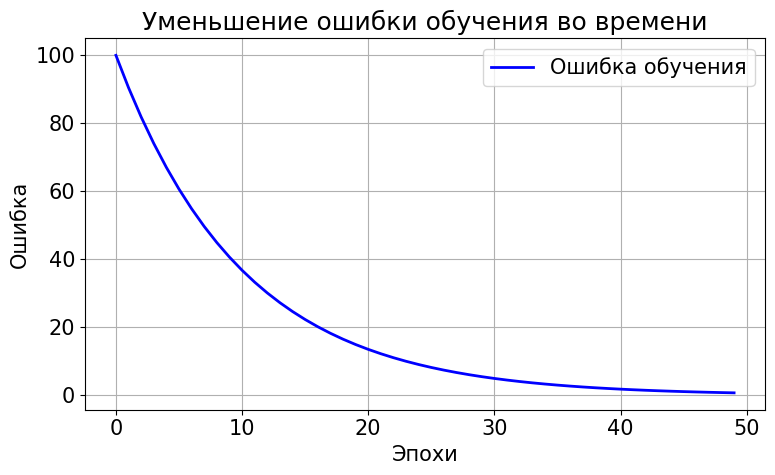

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# Сгенерируем данные
epochs = np.arange(0, 50)
loss = 100 * np.exp(-0.1 * epochs)

# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, "b-", linewidth=2, label="Ошибка обучения")
plt.xlabel("Эпохи")
plt.ylabel("Ошибка")
plt.title("Уменьшение ошибки обучения во времени")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Сохраняем график
filename = "learning_curve.png"
plt.savefig(filename)
plt.show()
plt.close()

### 2. Обратное распространение ошибки


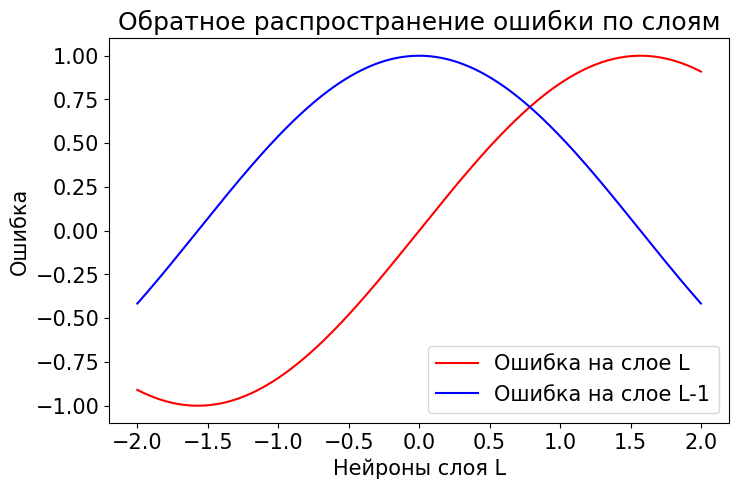

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Создание данных
x = np.linspace(-2, 2, 400)
y1 = np.sin(x)
y2 = np.cos(x)

# Построение графиков
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y1, "r", label="Ошибка на слое L")
ax.plot(x, y2, "b", label="Ошибка на слое L-1")
ax.set_title("Обратное распространение ошибки по слоям")
ax.set_xlabel("Нейроны слоя L")
ax.set_ylabel("Ошибка")
ax.legend()

# Сохранение графика
filename = "backpropagation_error.png"
plt.savefig(filename)
plt.show()
plt.close()

### 3. Методы оптимизации: SGD, Adam, RMSprop


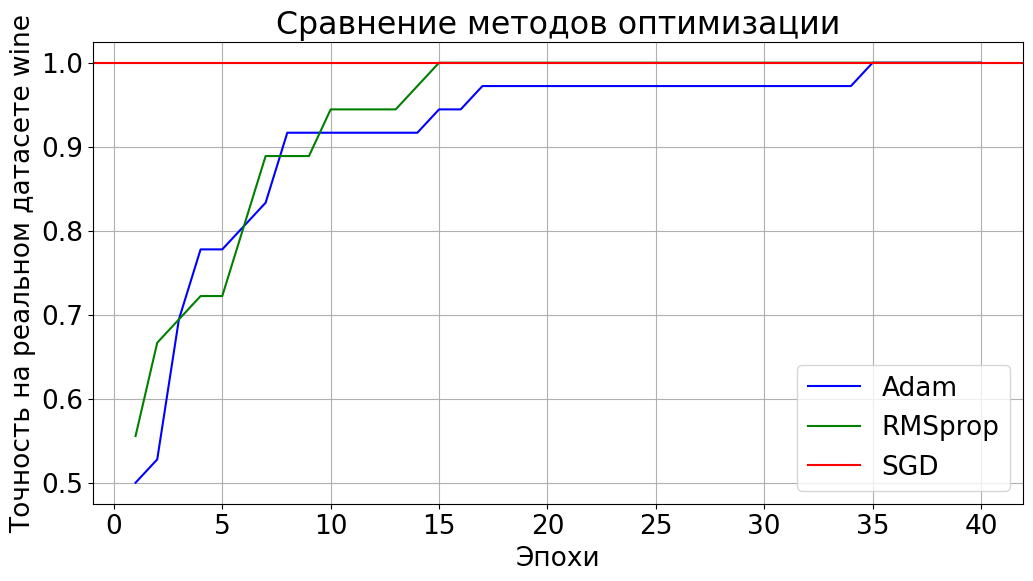

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from keras.optimizers import Adam, RMSprop
from keras.models import Sequential
from keras.layers import Dense

plt.rcParams.update({"font.size": 19})
# Загрузка и предобработка данных
epochsAll = 40
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SGD
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
sgd_score = clf.score(X_test, y_test)


# Создание базовой структуры для моделей Keras
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    return model


# Adam
model_adam = create_model(Adam(learning_rate=0.003))
history_adam = model_adam.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochsAll, verbose=0
)
adam_score = np.mean(history_adam.history["val_accuracy"][-5:])

# RMSprop
model_rms = create_model(RMSprop(learning_rate=0.003))
history_rms = model_rms.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochsAll, verbose=0
)
rms_score = np.mean(history_rms.history["val_accuracy"][-5:])

# График сравнения
epochs = range(1, epochsAll + 1)
plt.figure(figsize=(12, 6))
plt.plot(epochs, history_adam.history["val_accuracy"], "b", label="Adam")
plt.plot(epochs, history_rms.history["val_accuracy"], "g", label="RMSprop")
plt.axhline(y=sgd_score, color="r", linestyle="-", label="SGD")
plt.xlabel("Эпохи")
plt.ylabel("Точность на реальном датасете wine")
plt.title("Сравнение методов оптимизации")
plt.legend()
plt.grid(True)
filename = "real_optimization_comparison.png"
plt.savefig(filename)
plt.show()
plt.close()

### 4. Функции потерь и активации


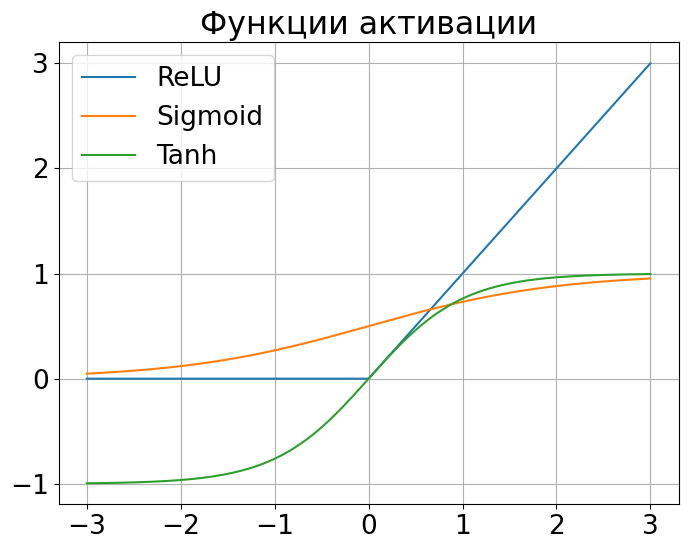

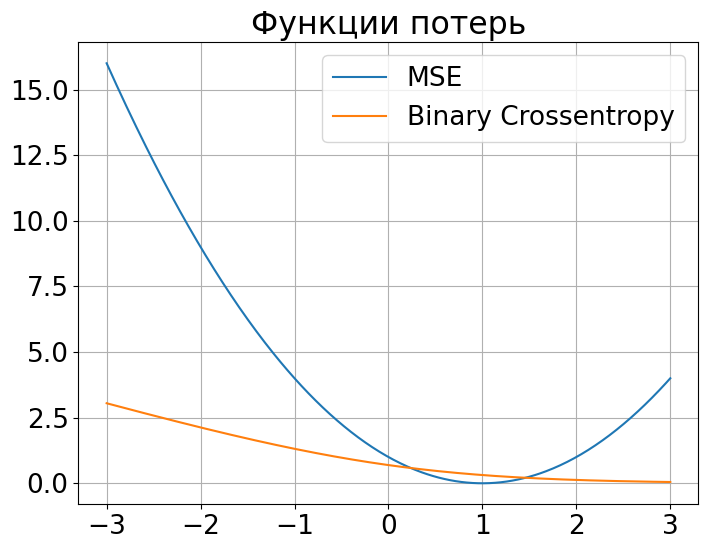

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация значений для функций активации
x = np.linspace(-3, 3, 400)
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

# Генерация графика функций активации
plt.figure(figsize=(8, 6))
plt.plot(x, relu, label="ReLU")
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.title("Функции активации")
plt.grid(True)
filename_activation = "activation_functions.png"
plt.savefig(filename_activation)
plt.show()
plt.close()

# Генерация значений для функций потерь
y_true = 1  # пример истинного значения
mse = (x - y_true) ** 2
binary_crossentropy = -y_true * np.log(sigmoid) - (1 - y_true) * np.log(1 - sigmoid)

# Генерация графика функций потерь
plt.figure(figsize=(8, 6))
plt.plot(x, mse, label="MSE")
plt.plot(x, binary_crossentropy, label="Binary Crossentropy")
plt.legend()
plt.title("Функции потерь")
plt.grid(True)
filename_loss = "loss_functions.png"
plt.savefig(filename_loss)
plt.show()
plt.close()

### 4. Функции потерь и активации


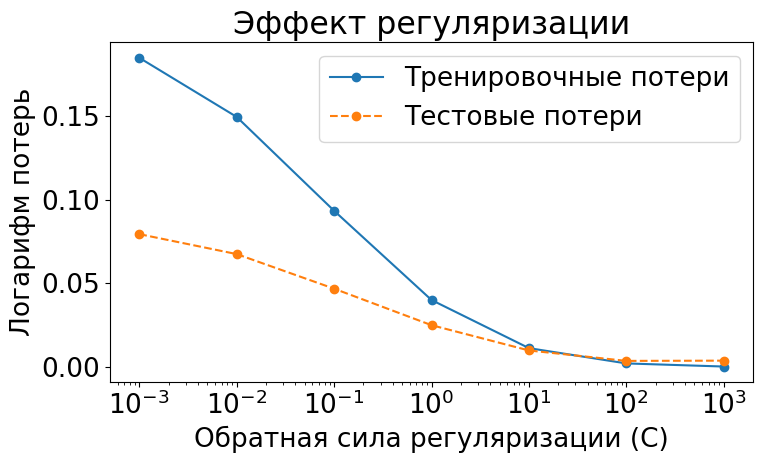

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Загрузка данных
data = load_wine()
X = data.data
y = (data.target == 0).astype(int)  # бинарная классификация: класс 0 против других

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

loss_train = []
loss_test = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in C_values:
    # Обучение модели с L2-регуляризацией
    clf = LogisticRegression(penalty="l2", C=C, max_iter=5000)
    clf.fit(X_train, y_train)

    # Предсказания модели
    y_train_pred = clf.predict_proba(X_train)
    y_test_pred = clf.predict_proba(X_test)

    # Вычисление log loss
    loss_train.append(log_loss(y_train, y_train_pred))
    loss_test.append(log_loss(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(C_values, loss_train, marker="o", label="Тренировочные потери")
plt.plot(C_values, loss_test, marker="o", label="Тестовые потери", linestyle="--")
plt.xscale("log")
plt.xlabel("Обратная сила регуляризации (C)")
plt.ylabel("Логарифм потерь")
plt.title("Эффект регуляризации")
plt.legend()
plt.tight_layout()
plt.savefig("regularization_effect_wine.png")
plt.show()

## 4. Глубокое обучение в практике

### 1. Глубокое обучение в изображениях


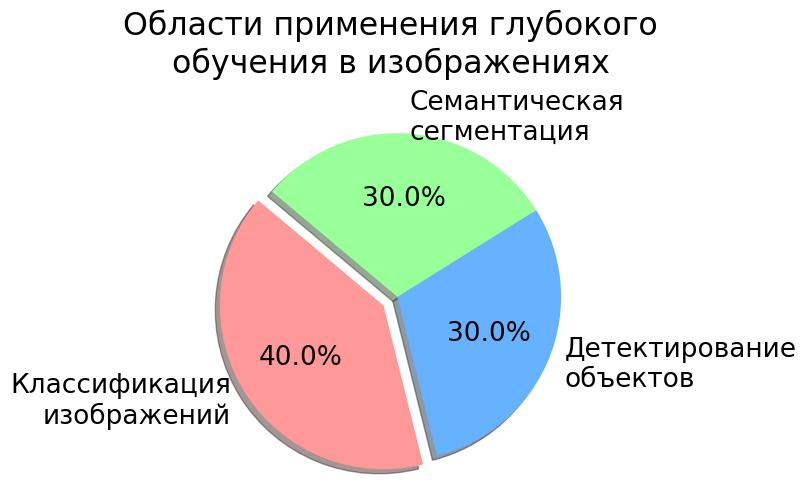

In [10]:
# Опционально код для генерации иллюстрации
import matplotlib.pyplot as plt

labels = [
    "Классификация\nизображений",
    "Детектирование\nобъектов",
    "Семантическая\nсегментация",
]
sizes = [40, 30, 30]
colors = ["#ff9999", "#66b2ff", "#99ff99"]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
)
plt.rcParams.update({"font.size": 19})
ax1.axis("equal")
plt.title("Области применения глубокого\nобучения в изображениях\n")
plt.savefig("deep_learning_in_images.png", dpi=300)
plt.show()

### 4. Transfer learning и fine-tuning


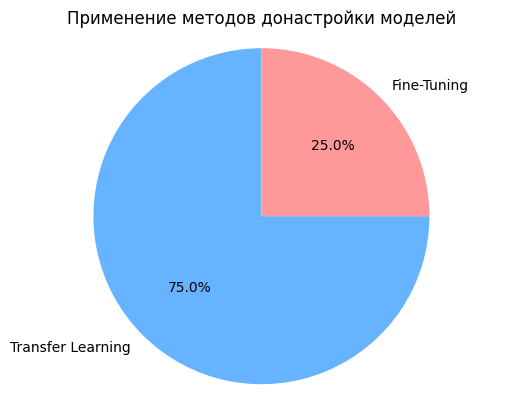

In [2]:
# Код для иллюстрации
import matplotlib.pyplot as plt

# Примерные данные
labels = ["Transfer Learning", "Fine-Tuning"]
values = [
    75,
    25,
]  # Примерные значения процентов использования каждого метода в индустрии (для иллюстрации)
colors = ["#66b3ff", "#ff9999"]

# Создание круговой диаграммы
fig1, ax1 = plt.subplots()
ax1.pie(values, colors=colors, labels=labels, autopct="%1.1f%%", startangle=90)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Применение методов донастройки моделей")
plt.savefig("comparison_chart.png")

## 5. Современные методы и направления

### 1. Обучение с подкреплением


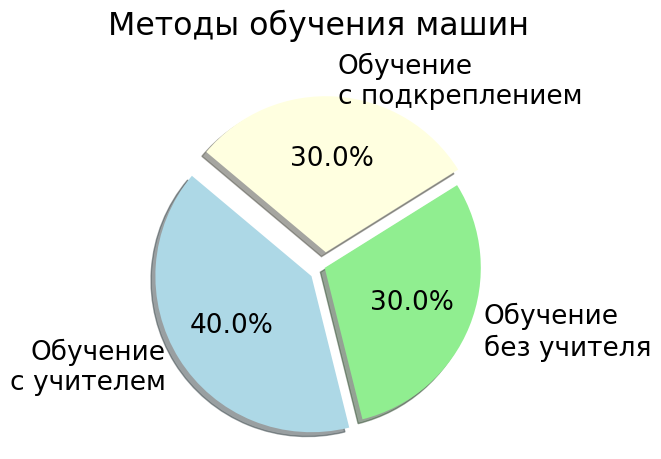

In [5]:
# Опционально код для генерации иллюстрации
import matplotlib.pyplot as plt

labels = ["Обучение\nс учителем", "Обучение\nбез учителя", "Обучение\nс подкреплением"]
sizes = [40, 30, 30]
colors = ["lightblue", "lightgreen", "lightyellow"]
explode = (0.1, 0, 0.1)

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
)
plt.rcParams.update({"font.size": 19})
plt.axis("equal")
plt.title("Методы обучения машин\n")
plt.savefig("learning_methods.png")
plt.show()

## 6. Продвинутые техники глубокого обучения

### 1. One-shot и Few-shot learning


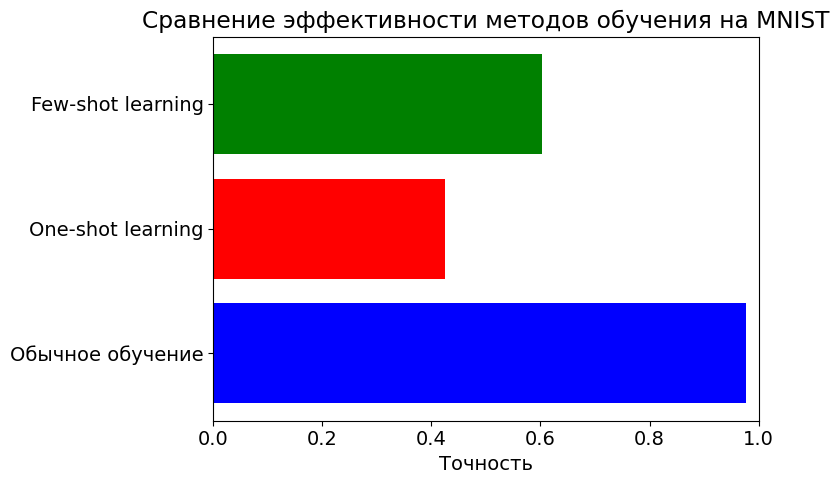

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784) / 255.0
x_test = x_test.reshape(x_test.shape[0], 784) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Определение модели
def create_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_shape=(784,)))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


# Обучение базовой модели
model = create_model()
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=0)
traditional_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]

# One-shot learning
indices_one_shot = [np.where(np.argmax(y_train, axis=1) == i)[0][0] for i in range(10)]
model_one_shot = create_model()
model_one_shot.fit(
    x_train[indices_one_shot], y_train[indices_one_shot], epochs=10, verbose=0
)
one_shot_accuracy = model_one_shot.evaluate(x_test, y_test, verbose=0)[1]

# Few-shot learning (5 примеров каждого класса)
indices_few_shot = [np.where(np.argmax(y_train, axis=1) == i)[0][:5] for i in range(10)]
indices_few_shot = np.concatenate(indices_few_shot)
model_few_shot = create_model()
model_few_shot.fit(
    x_train[indices_few_shot], y_train[indices_few_shot], epochs=10, verbose=0
)
few_shot_accuracy = model_few_shot.evaluate(x_test, y_test, verbose=0)[1]

# График сравнения
methods = ["Обычное обучение", "One-shot learning", "Few-shot learning"]
accuracies = [traditional_accuracy, one_shot_accuracy, few_shot_accuracy]

plt.figure(figsize=(8, 5))
plt.barh(methods, accuracies, color=["blue", "red", "green"])
plt.xlabel("Точность")
plt.title("Сравнение эффективности методов обучения на MNIST")
plt.xlim(0, 1)
plt.rcParams.update({"font.size": 12})
plt.tight_layout()
plt.savefig("learning_efficiency_comparison.png")

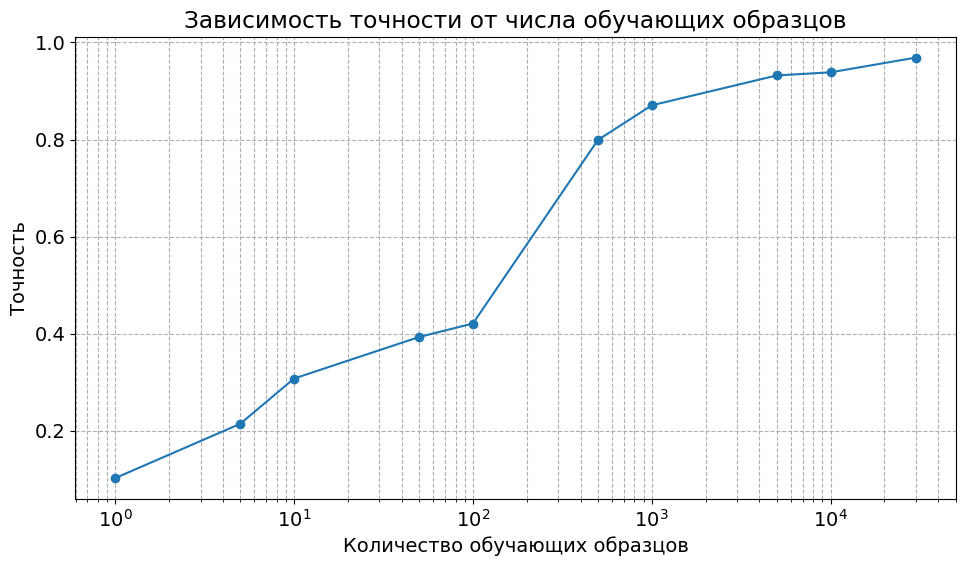

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784) / 255.0
x_test = x_test.reshape(x_test.shape[0], 784) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Определение модели
def create_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_shape=(784,)))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


sample_sizes = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 30000]
accuracies = []

for size in sample_sizes:
    indices = np.random.choice(x_train.shape[0], size, replace=False)
    model = create_model()
    model.fit(x_train[indices], y_train[indices], epochs=10, batch_size=256, verbose=0)
    accuracies.append(model.evaluate(x_test, y_test, verbose=0)[1])

# График сравнения
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, accuracies, "-o")
plt.xscale("log")
plt.xlabel("Количество обучающих образцов")
plt.ylabel("Точность")
plt.title("Зависимость точности от числа обучающих образцов")
plt.grid(True, which="both", ls="--")
plt.rcParams.update({"font.size": 18})
plt.tight_layout()
plt.savefig("accuracy_vs_samples.png")

## 7. Инструменты и библиотеки для глубокого обучения

### 1. TensorFlow и Keras


In [57]:
# Изучение палитр
import seaborn as sns
from PIL import Image, ImageDraw

iter = 15
palttes = ["viridis_r", "inferno_r", "magma_r", "icefire_r", "Reds_r", "summer_r"]
palette = list(reversed(sns.color_palette(palttes[2], iter).as_hex()))
print(palette)

width_px = 1000
new = Image.new(mode="RGB", size=(width_px, 120))

for i in range(iter):
    newt = Image.new(mode="RGB", size=(width_px // iter, 100), color=palette[i])
    new.paste(newt, (i * width_px // iter, 10))
new.show()

['#090720', '#1c1044', '#341069', '#4f127b', '#681c81', '#812581', '#9b2e7f', '#b5367a', '#cf4070', '#e55064', '#f4695c', '#fb8761', '#fea571', '#fec287', '#fde0a1']


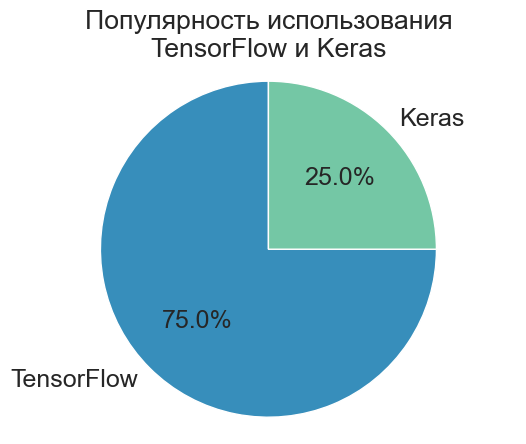

In [61]:
# Код для генерации иллюстрации
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = ["TensorFlow", "Keras"]
usage = [75, 25]

fig, ax = plt.subplots()
palette = sns.color_palette("Spectral_r", 8)
ax.pie(usage, labels=labels, autopct="%1.1f%%", startangle=90, colors=palette)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams.update({"font.size": 16})
plt.title("Популярность использования\nTensorFlow и Keras")
plt.savefig("tensorflow_keras_usage.png")

### 3. Fast.ai и другие высокоуровневые API


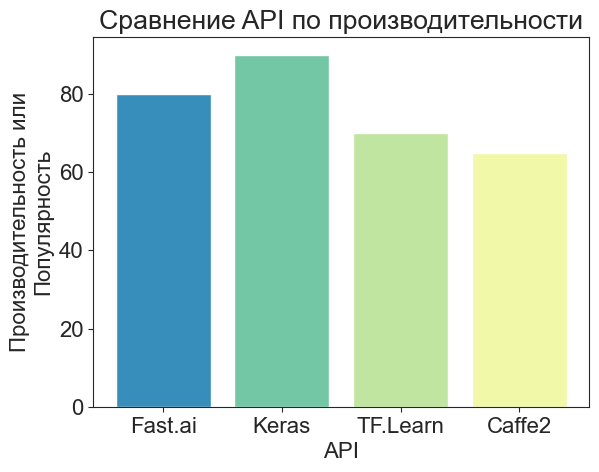

In [62]:
# Для данного примера мы создаем простую столбчатую диаграмму сравнения API по популярности или производительности.

import matplotlib.pyplot as plt

apis = ["Fast.ai", "Keras", "TF.Learn", "Caffe2"]
values = [80, 90, 70, 65]
palette = sns.color_palette("Spectral_r", 8)
plt.bar(apis, values, color=palette)
plt.xlabel("API")
plt.ylabel("Производительность или\nПопулярность")
plt.title("Сравнение API по производительности")

plt.savefig("comparison_img.png")
plt.show()

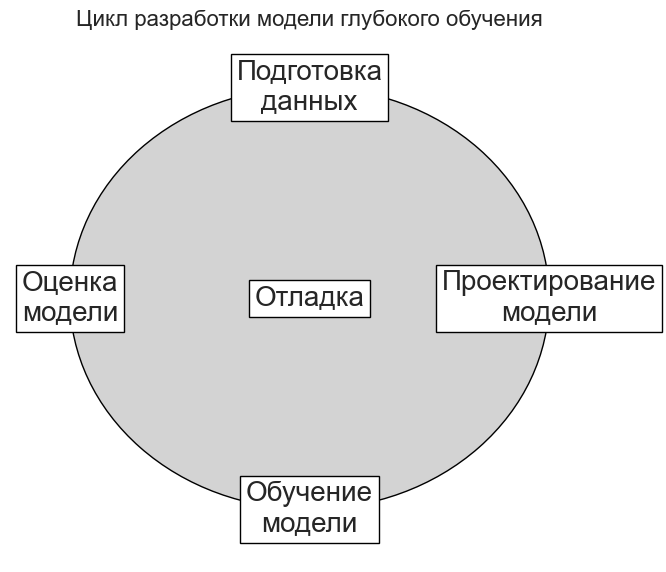

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def plot_development_cycle():
    fig, ax = plt.subplots(figsize=(7, 6))

    circle = patches.Circle((0.5, 0.5), 0.4, color="lightgray", ec="black")
    ax.add_patch(circle)

    stages = [
        ("Подготовка\nданных", (0.5, 0.9)),
        ("Проектирование\nмодели", (0.9, 0.5)),
        ("Обучение\nмодели", (0.5, 0.1)),
        ("Оценка\nмодели", (0.1, 0.5)),
        ("Отладка", (0.5, 0.5)),
    ]

    for s, (x, y) in stages:
        ax.text(
            x,
            y,
            s,
            ha="center",
            va="center",
            fontsize=20,
            bbox=dict(facecolor="white", edgecolor="black"),
        )

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis("off")

    plt.title("Цикл разработки модели глубокого обучения", fontsize=16)
    plt.tight_layout()

    # Сохраняем изображение
    plt.savefig("development_cycle.png", dpi=300)
    plt.show()


# Вызываем функцию
plot_development_cycle()

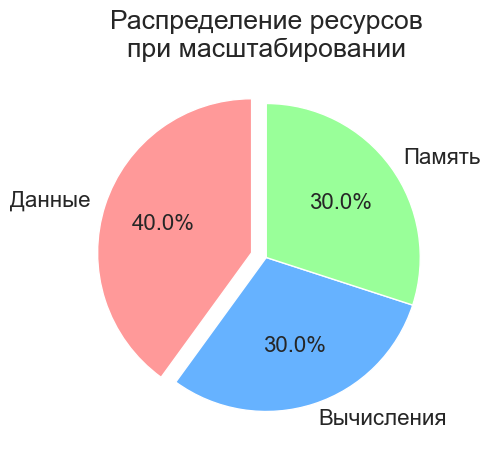

In [78]:
import matplotlib.pyplot as plt

labels = ["Данные", "Вычисления", "Память"]
sizes = [40, 30, 30]
colors = ["#ff9999", "#66b2ff", "#99ff99"]
explode = (0.1, 0, 0)

plt.figure(figsize=(7, 5))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Распределение ресурсов\nпри масштабировании")
plt.savefig("scaling_problems.png")
plt.show()

## 9. Практические примеры и кейсы

### 1. Глубокое обучение в медицине


C:\Users\inimatic\AppData\Local\Temp\ipykernel_31060\2325826716.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=palette)


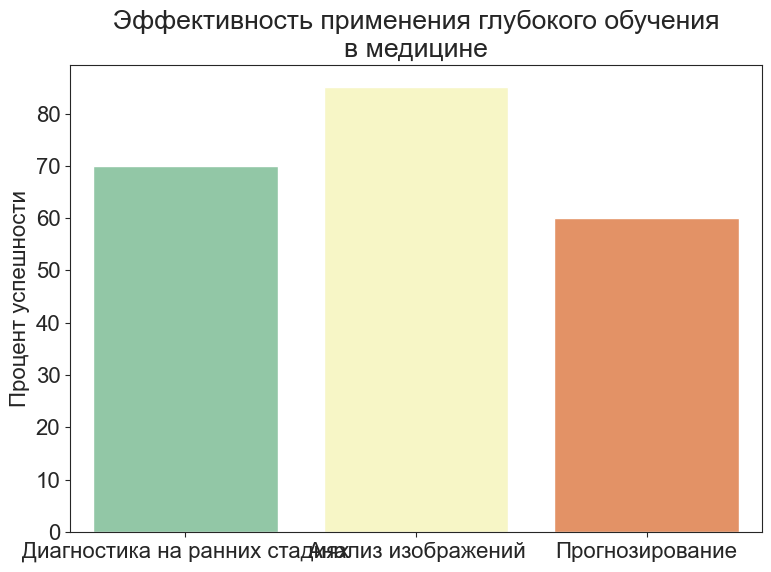

In [80]:
# Опционально код для генерации иллюстрации
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Диагностика на ранних стадиях", "Анализ изображений", "Прогнозирование"]
values = [70, 85, 60]

palette = sns.color_palette("Spectral_r", len(labels))

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette=palette)
plt.ylabel("Процент успешности")
plt.title("Эффективность применения глубокого обучения\nв медицине")
plt.tight_layout()
plt.savefig("deep_learning_medicine.png")
plt.show()